## Практическое задание
 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).


In [1]:
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from seaborn import pairplot

from tensorflow import linspace
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2021-08-07 13:33:10.808533: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-07 13:33:10.808562: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
feature_names = load_boston()['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
feature_names = load_boston()['feature_names']
X, y = load_boston(return_X_y=True)
X = pd.DataFrame(X, columns=feature_names)

In [5]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
X.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [7]:
X = pd.get_dummies(X, columns=['CHAS'], prefix='', prefix_sep='')

In [8]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0.0,1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,0


In [9]:
target = load_boston()['target']
data = X.copy()
data['Target'] = target
data.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0.0,1.0,Target
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,1,0,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,1,0,21.6


In [10]:
train_dataset = data.sample(frac=0.8, random_state=111)
test_dataset = data.drop(train_dataset.index)

In [11]:
# pairplot(train_dataset[cont_feature_names], diag_kind='kde')

In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.746424,8.692403,0.00632,0.08187,0.24522,3.67822,88.9762
ZN,405.0,11.916049,23.772053,0.00000,0.00000,0.00000,20.00000,100.0000
INDUS,405.0,11.015580,6.842772,0.46000,5.13000,9.69000,18.10000,27.7400
NOX,405.0,0.556308,0.120449,0.38500,0.44800,0.53800,0.63100,0.8710
RM,405.0,6.245657,0.707336,3.56100,5.87000,6.16700,6.59500,8.7250
AGE,405.0,68.168642,28.501279,2.90000,42.30000,77.80000,93.90000,100.0000
DIS,405.0,3.833297,2.169948,1.12960,2.04590,3.27210,5.28730,12.1265
RAD,405.0,9.533333,8.730679,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,407.024691,169.163330,187.00000,279.00000,330.00000,666.00000,711.0000
PTRATIO,405.0,18.441481,2.161753,12.60000,17.00000,19.10000,20.20000,22.0000


In [13]:
train_features = train_dataset[train_dataset.columns].copy()
test_features = test_dataset[train_dataset.columns].copy()

train_labels = train_features.pop('Target')
test_labels = test_features.pop('Target')

In [14]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.746424,8.692403
ZN,11.916049,23.772053
INDUS,11.015580,6.842772
NOX,0.556308,0.120449
RM,6.245657,0.707336
AGE,68.168642,28.501279
DIS,3.833297,2.169948
RAD,9.533333,8.730679
TAX,407.024691,169.163330
PTRATIO,18.441481,2.161753


In [15]:
normalizer = preprocessing.Normalization(axis=-1)

In [16]:
normalizer.adapt(np.array(train_features))

2021-08-07 13:33:11.962995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-07 13:33:11.963020: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-07 13:33:11.963036: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mitko-pc): /proc/driver/nvidia/version does not exist
2021-08-07 13:33:11.963227: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-07 13:33:12.008063: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optim

In [17]:
print(normalizer.mean.numpy())

[3.7464242e+00 1.1916048e+01 1.1015580e+01 5.5630761e-01 6.2456560e+00
 6.8168640e+01 3.8332965e+00 9.5333338e+00 4.0702472e+02 1.8441483e+01
 3.5599091e+02 1.2857385e+01 9.3827152e-01 6.1728392e-02]


### 1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston.

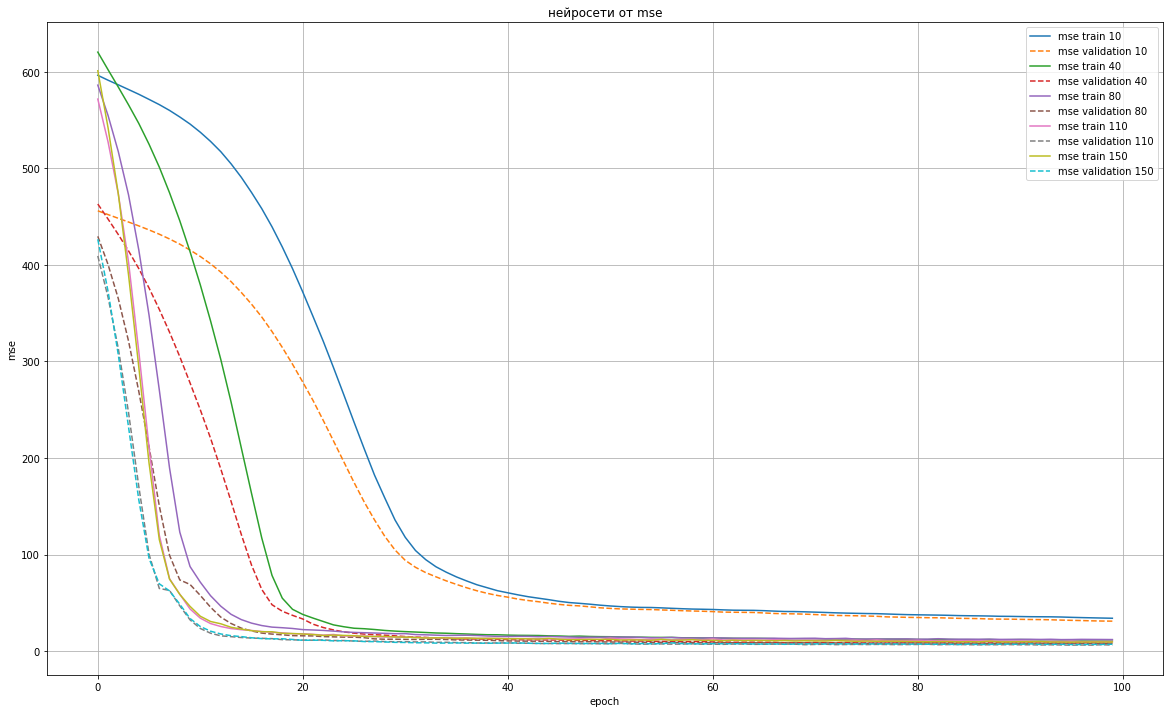

In [18]:
# Изменяем число нейронов

neuron_numb = [10, 40, 80, 110, 150]
test_results = []

plt.figure(figsize=(20,12))

for n in neuron_numb:
    name=f'{n}-neuron number model'
    model = Sequential([
      normalizer,
      layers.Dense(n / 2, activation='relu'),
      layers.Dense(n / 2, activation='relu'),
      layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
 
    model_history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

    plt.plot(model_history.history['mse'], '-', label = f'mse train {n}')
    plt.plot(model_history.history['val_mse'], '--', label = f'mse validation {n}')
    
    mae, mse = model.evaluate(test_features, test_labels, verbose=0)
    test_results.append([name, mae, mse])
        
plt.legend()
plt.grid('On')
plt.title('нейросети от mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [19]:
pd.DataFrame(test_results, columns=['model', 'mae', 'mse'])

,model,mae,mse
0,10-neuron number model,3.949000,38.217777
1,40-neuron number model,2.949270,22.212729
2,80-neuron number model,2.936426,20.792316
3,110-neuron number model,2.956347,23.321949
4,150-neuron number model,2.817393,21.481569


### При большом количестве эпох практически не увидела разницу (отличие при малом числе нейронов). Возьмем число эпох - 15

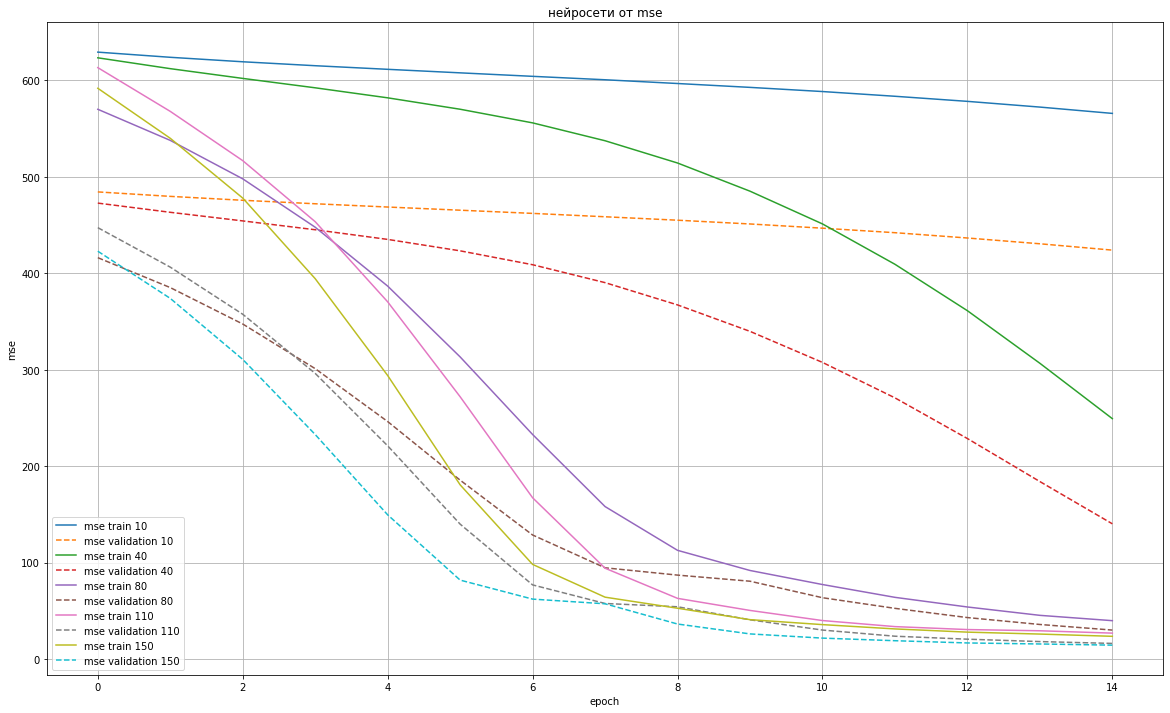

In [20]:
neuron_numb = [10, 40, 80, 110, 150]
test_results = []

plt.figure(figsize=(20,12))

for n in neuron_numb:
    name=f'{n}-neuron number model'
    model = Sequential([
      normalizer,
      layers.Dense(n / 2, activation='relu'),
      layers.Dense(n / 2, activation='relu'),
      layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
 
    model_history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=15)

    plt.plot(model_history.history['mse'], '-', label = f'mse train {n}')
    plt.plot(model_history.history['val_mse'], '--', label = f'mse validation {n}')
    
    mae, mse = model.evaluate(test_features, test_labels, verbose=0)
    test_results.append([name, mae, mse])
        
plt.legend()
plt.grid('On')
plt.title('нейросети от mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [21]:
pd.DataFrame(test_results, columns=['model', 'mae', 'mse'])

,model,mae,mse
0,10-neuron number model,22.055058,572.082458
1,40-neuron number model,12.944652,228.617188
2,80-neuron number model,4.169316,41.729397
3,110-neuron number model,3.786835,31.763231
4,150-neuron number model,3.592242,27.536795


### Здесь уже есть лидеры - 80-150 нейронов.

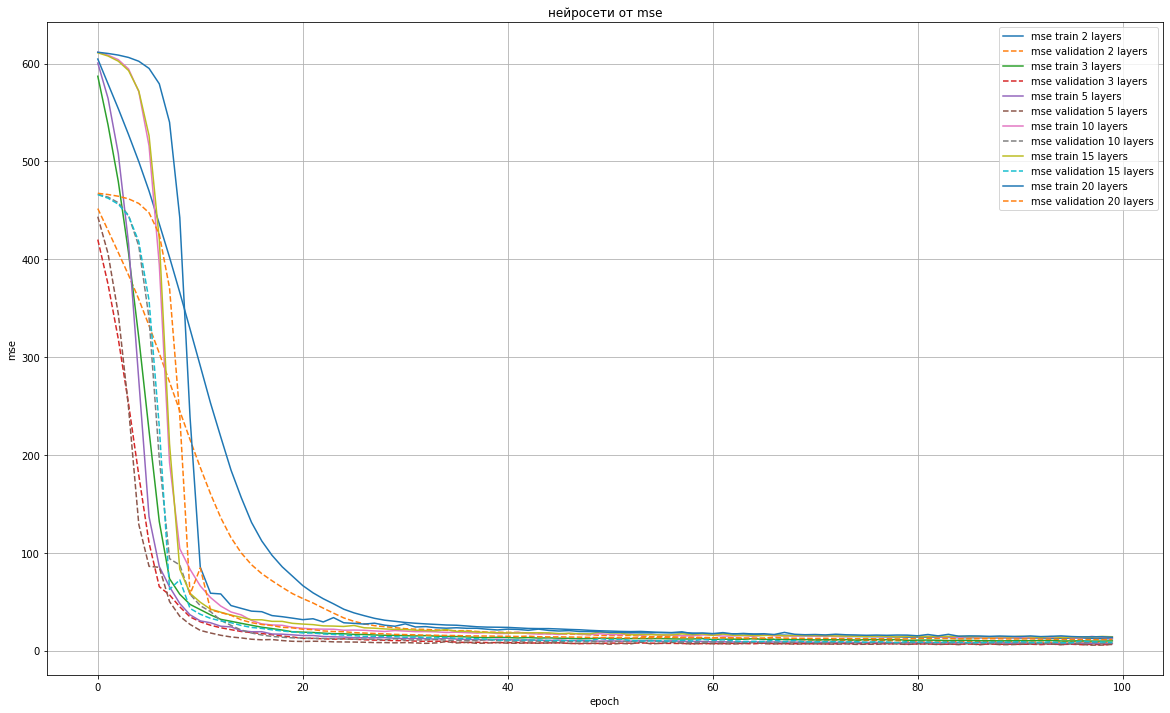

In [22]:
# Изменяем число слоев

neuron_numb = 120
layers_numb = [2, 3, 5, 10, 15, 20]
test_results = []

plt.figure(figsize=(20,12))

for l_num in layers_numb:
    name=f'{l_num}-layer_model'
    model = Sequential(normalizer) 

    for k in range(l_num-1):
        model.add(Dense(neuron_numb / (l_num-1), activation='relu')) 
        
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
 
    model_history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

    plt.plot(model_history.history['mse'], '-', label = f'mse train {l_num} layers')
    plt.plot(model_history.history['val_mse'], '--', label = f'mse validation {l_num} layers')
    
    mae, mse = model.evaluate(test_features, test_labels, verbose=0)
    test_results.append([name, mae, mse])
        
plt.legend()
plt.grid('On')
plt.title('нейросети от mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [23]:
pd.DataFrame(test_results, columns=['model', 'mae', 'mse'])

,model,mae,mse
0,2-layer_model,2.853433,19.938208
1,3-layer_model,2.757639,21.264759
2,5-layer_model,2.820483,19.930389
3,10-layer_model,2.663727,21.462545
4,15-layer_model,3.154279,26.402184
5,20-layer_model,3.143917,20.875816


### Снова при большом количестве эпох не увидела разницу, кроме варианта с 20 слоями. Возьмем количество эпох - 15

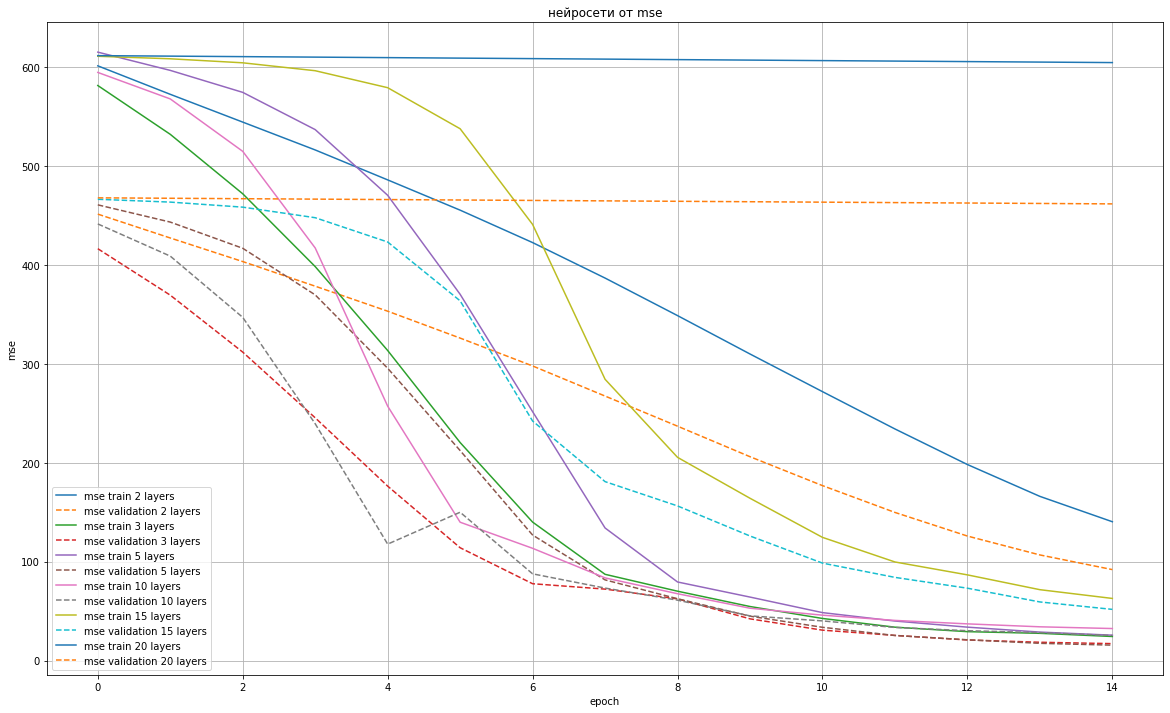

In [24]:
neuron_numb = 120
layers_numb = [2, 3, 5, 10, 15, 20]
test_results = []

plt.figure(figsize=(20,12))

for l_num in layers_numb:
    name=f'{l_num}-layer_model'
    model = Sequential(normalizer) 

    for k in range(l_num-1):
        model.add(Dense(neuron_numb / (l_num-1), activation='relu')) 
        
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
 
    model_history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=15)

    plt.plot(model_history.history['mse'], '-', label = f'mse train {l_num} layers')
    plt.plot(model_history.history['val_mse'], '--', label = f'mse validation {l_num} layers')
    
    mae, mse = model.evaluate(test_features, test_labels, verbose=0)
    test_results.append([name, mae, mse])
        
plt.legend()
plt.grid('On')
plt.title('нейросети от mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [25]:
pd.DataFrame(test_results, columns=['model', 'mae', 'mse'])

,model,mae,mse
0,2-layer_model,9.634830,136.885361
1,3-layer_model,3.677469,28.488451
2,5-layer_model,3.828970,33.775928
3,10-layer_model,3.839203,32.385387
4,15-layer_model,4.808440,49.888580
5,20-layer_model,23.282526,619.672302


### Лучшие - 3, 5 и 10 слоев

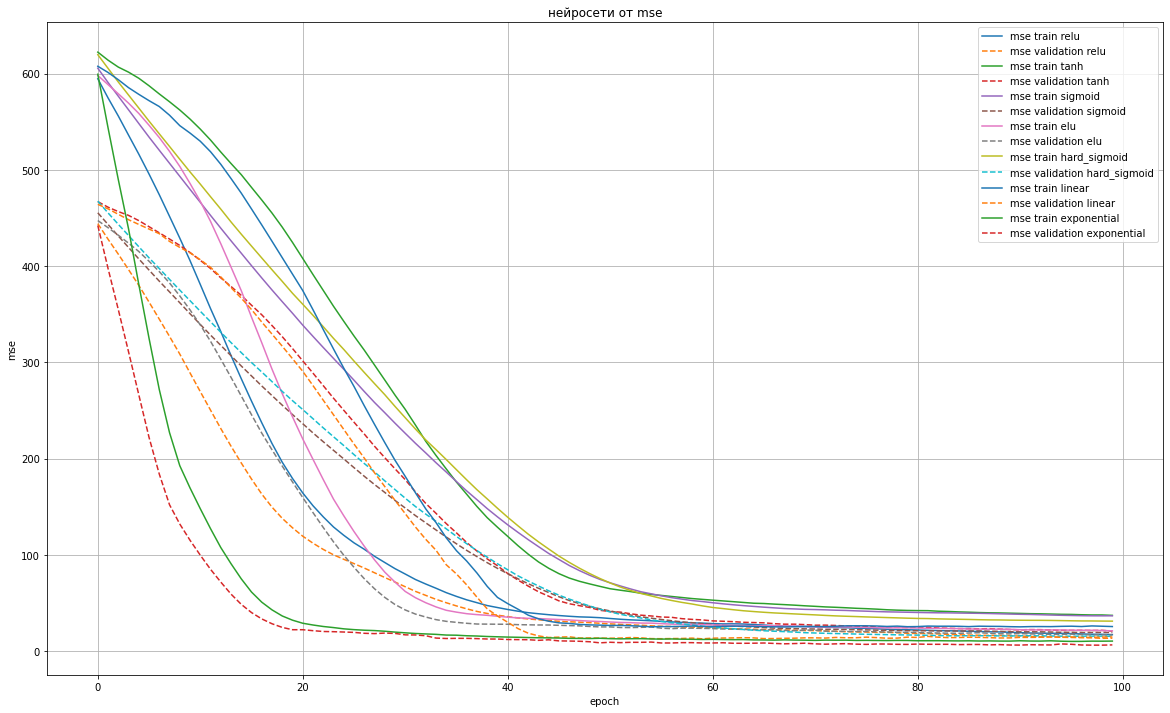

In [26]:
# Изменим тип активационной функции

neuron_numb = 50

activation_func = ['relu', 'tanh', 'sigmoid', 'elu', 'hard_sigmoid', 'linear', 'exponential']
test_results = []

plt.figure(figsize=(20,12))

for func in activation_func:
    name=f'{func}_model'
    model = Sequential([
      normalizer,
      layers.Dense(neuron_numb, activation=func),
      layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
 
    model_history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

    plt.plot(model_history.history['mse'], '-', label = f'mse train {func}')
    plt.plot(model_history.history['val_mse'], '--', label = f'mse validation {func}')
    
    mae, mse = model.evaluate(test_features, test_labels, verbose=0)
    test_results.append([name, mae, mse])
        
plt.legend()
plt.grid('On')
plt.title('нейросети от mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [27]:
pd.DataFrame(test_results, columns=['model', 'mae', 'mse'])

,model,mae,mse
0,relu_model,3.257881,24.234846
1,tanh_model,3.544516,37.142319
2,sigmoid_model,3.511160,34.193905
3,elu_model,3.200646,23.687950
4,hard_sigmoid_model,3.355384,29.746784
5,linear_model,3.195132,27.276569
6,exponential_model,2.744055,14.911684


### При большом количестве эпох лучше всего себя показывают функции ELU и ReLu (при перезапуске то одна, то другая показывает лучший результат, но чаще ELU).

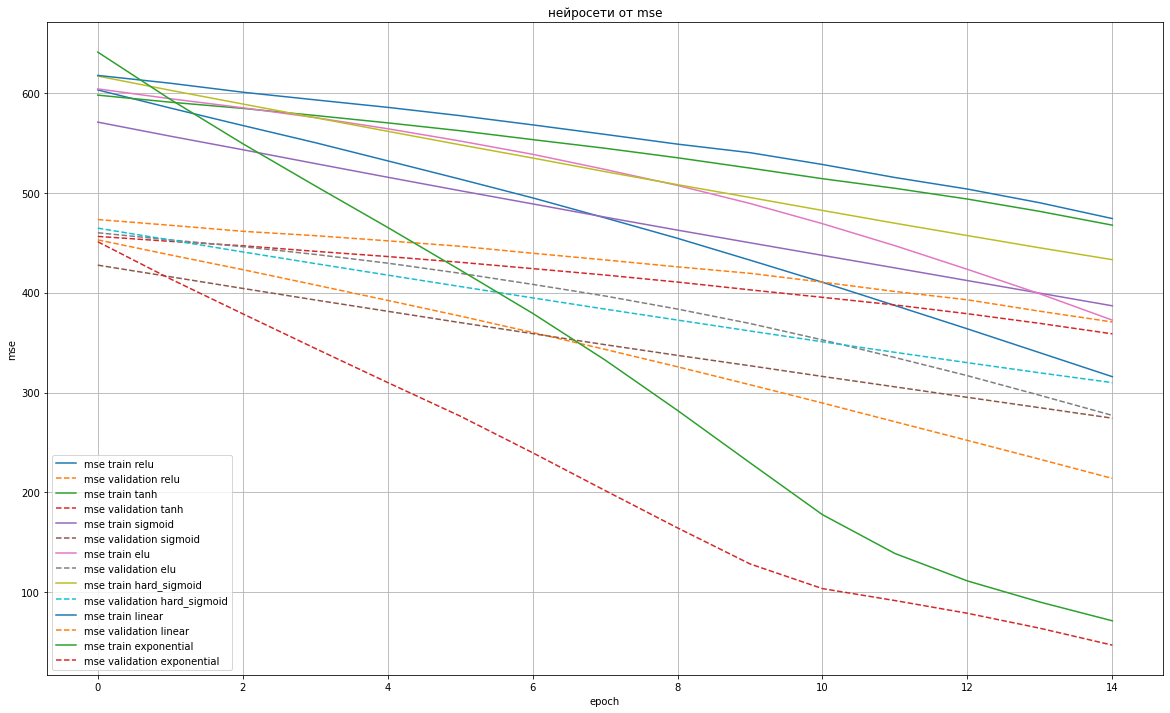

In [28]:
# Изменим тип активационной функции

neuron_numb = 50

activation_func = ['relu', 'tanh', 'sigmoid', 'elu', 'hard_sigmoid', 'linear', 'exponential']
test_results = []

plt.figure(figsize=(20,12))

for func in activation_func:
    name=f'{func}_model'
    model = Sequential([
      normalizer,
      layers.Dense(neuron_numb, activation=func),
      layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer='adam',
        loss='mean_absolute_error',
        metrics=['mse'])
 
    model_history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=15)

    plt.plot(model_history.history['mse'], '-', label = f'mse train {func}')
    plt.plot(model_history.history['val_mse'], '--', label = f'mse validation {func}')
    
    mae, mse = model.evaluate(test_features, test_labels, verbose=0)
    test_results.append([name, mae, mse])
        
plt.legend()
plt.grid('On')
plt.title('нейросети от mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [29]:
pd.DataFrame(test_results, columns=['model', 'mae', 'mse'])

,model,mae,mse
0,relu_model,15.800171,316.805695
1,tanh_model,20.361963,474.026154
2,sigmoid_model,17.946341,390.605774
3,elu_model,18.232815,380.004913
4,hard_sigmoid_model,19.019899,437.479034
5,linear_model,20.353750,470.162750
6,exponential_model,6.911176,83.707619


### Тут лучше всего получилась модель с экспонентой.

In [30]:

    model_l = Sequential(name=f'{layers}_layer_model')
    model_l.add(Dense(128, activation='relu', input_shape=(784,)))  

    for k in range(layers-1):
        model_l.add(Dense(neuron_numb / (layers-1), activation='tanh')) 

    model_l.add(Dense(10, activation='softmax'))
    
    if layers == 3:
        model_l.save_weights('model.l3') # сохраним для задания №2
#         print(model_l.summary())

    model_l.compile(
        optimizer='adam',
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy'],
    ) 
    model_l_history = model_l.fit(
        train_images[:,:],
        y_t[:,:],
        epochs=15,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    plt.plot(model_l_history.history['accuracy'], '-', label = f'accuracy train {layers}-слойная модель')
    plt.plot(model_l_history.history['val_accuracy'], '--', label = f'accuracy validation {layers}-слойная модель')
        
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

TypeError: unsupported operand type(s) for -: 'module' and 'int'

In [ ]:
plt.figure(figsize=(20,12))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

for i_optim in [keras.optimizers.SGD(), keras.optimizers.RMSprop(), keras.optimizers.Adam(), keras.optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать веса из предыдущего задания. Параметры сети - 3 слоя (2 скрытых по 15 нейронов)
    modeli = Sequential(name=f'{i_optim.get_config()["name"]}_layer_model')
    modeli.add(Dense(128, activation='relu', input_shape=(784,)))  

    for k in range(2):
        modeli.add(Dense(15, activation='tanh')) 

    modeli.add(Dense(10, activation='softmax'))
#     print(modeli.summary())
    
  # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.l3')

  # компилируем modeli с одним из оптимизаторов
    modeli.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )

    modeli_history = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )

    plt.plot(modeli_history.history['accuracy'], '-', label = f'accuracy train с {modeli.optimizer.get_config()["name"]}')
    plt.plot(modeli_history.history['val_accuracy'], '--', label = f'accuracy validation {modeli.optimizer.get_config()["name"]}')
     
plt.legend()
plt.grid('On')
plt.title('нейросети от accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()